In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
e=pd.read_csv('empl.csv')
sal=pd.DataFrame(e)
sal.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [4]:
sal.shape

(22, 6)

In [5]:
sal.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [6]:
sal['City'].value_counts()

HongKong     4
newyork      4
Hyderabad    2
Toronto      2
Edmonto      2
London       1
Angola       1
BayArea      1
Finland      1
Congo        1
Name: City, dtype: int64

In [7]:
sal['Country'].value_counts()

America    8
Asia       6
Canada     4
Europe     2
Africa     2
Name: Country, dtype: int64

In [8]:
sal.drop(['SNo','Name'],axis=1,inplace=True)

In [9]:
sal.head()

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.0
1,31.0,Edmonto,Canada,3900.0
2,34.0,Toronto,Canada,8000.0
3,26.0,HongKong,Asia,66672.0
4,30.0,NaN,America,NaN


In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean')
sal['Age']=imp.fit_transform(sal['Age'].values.reshape(-1,1))

In [11]:
sal['Salary']=imp.fit_transform(sal['Salary'].values.reshape(-1,1))

In [12]:
sal.dropna(inplace=True)

In [13]:
sal.isnull().sum()

Age        0
City       0
Country    0
Salary     0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
list=['Country','City']
for val in list:
    sal[val]=le.fit_transform(sal[val].astype(str))

In [16]:
sal.head()

,Age,City,Country,Salary
0,28.000000,8,3,20000.0
1,31.000000,3,3,3900.0
2,34.000000,8,3,8000.0
3,26.000000,5,2,66672.0
5,32.421053,5,2,30007.0


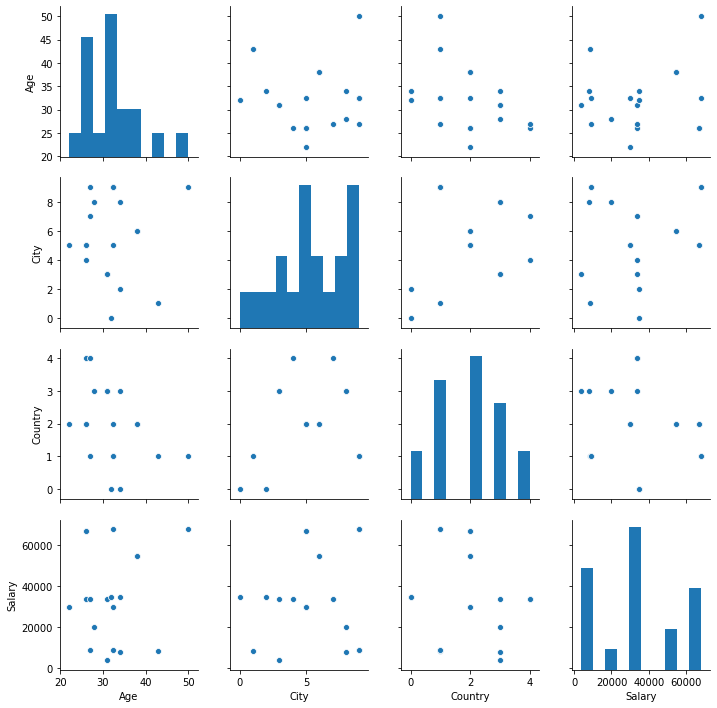

In [17]:
sns.pairplot(sal)

In [18]:
sal.describe()

,Age,City,Country,Salary
count,19.000000,19.000000,19.000000,19.000000
mean,32.119114,5.473684,1.947368,35047.099723
std,6.671924,2.815994,1.177270,22320.363242
min,22.000000,0.000000,0.000000,3900.000000
25%,27.000000,3.500000,1.000000,14444.000000
50%,32.000000,5.000000,2.000000,33739.947368
75%,34.000000,8.000000,3.000000,54666.000000
max,50.000000,9.000000,4.000000,67666.000000


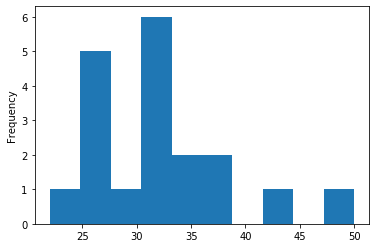

In [19]:
sal['Age'].plot.hist()

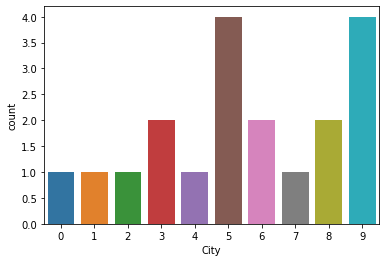

In [20]:
sns.countplot(x='City',data=sal)

In [21]:
from scipy.stats import boxcox
sal['Age']=boxcox(sal['Age'],0)

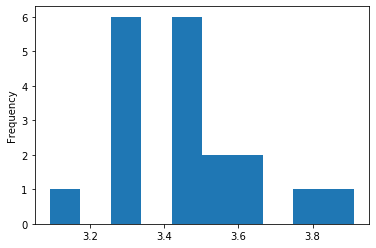

In [22]:
sal['Age'].plot.hist()

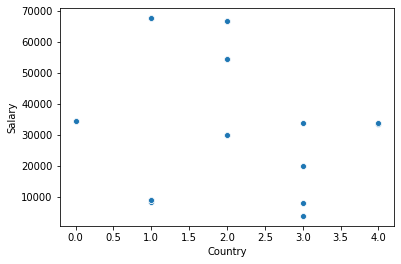

In [23]:
sns.scatterplot(x='Country',y='Salary',data=sal)

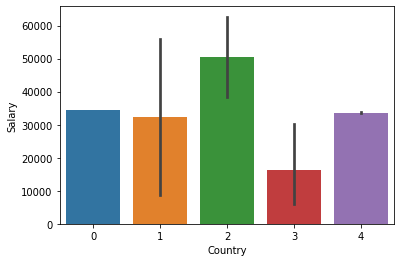

In [24]:
sns.barplot(x='Country',y='Salary',data=sal)

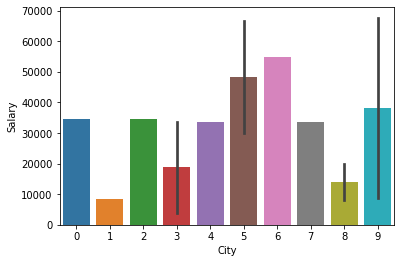

In [25]:
sns.barplot(x='City',y='Salary',data=sal)

Age           AxesSubplot(0.125,0.536818;0.352273x0.343182)
City       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Country          AxesSubplot(0.125,0.125;0.352273x0.343182)
Salary        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

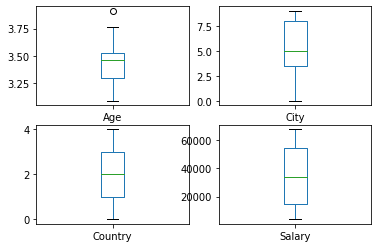

In [26]:
sal.plot(kind='box',subplots=True,layout=(2,2))

In [27]:
print(sal)

         Age  City  Country        Salary
0   3.332205     8        3  20000.000000
1   3.433987     3        3   3900.000000
2   3.526361     8        3   8000.000000
3   3.258097     5        2  66672.000000
5   3.478808     5        2  30007.000000
6   3.761200     1        1   8300.000000
7   3.637586     6        2  54666.000000
8   3.912023     9        1  67666.000000
9   3.478808     9        1   8888.000000
10  3.258097     5        2  66672.000000
12  3.091042     5        2  30007.000000
14  3.637586     6        2  54666.000000
15  3.478808     9        1  67666.000000
16  3.295837     9        1   8888.000000
17  3.433987     3        3  33739.947368
18  3.526361     2        0  34432.000000
19  3.465736     0        0  34534.000000
20  3.258097     4        4  33451.000000
21  3.295837     7        4  33739.947368


In [28]:
x=sal.iloc[:,:-1]
y=sal.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
def random(alg,x,y):
    r_state=0
    for r_score in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr > r_state:
            r_state=r2_scr
            final_r=r_score
    print(r2_scr,'at',final_r)

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr,x,y)

-2.88957507731525 at 55


In [33]:
def metrics(y_test,pred):
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=55)
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
pred=dtr.predict(x_test)
metrics(y_test,pred)

0.6811198314502849
mean_squared_error= 229176783.25
mean_absolute_error= 7594.75
r2_score= 0.536224011014379


In [35]:
dtrscore=cross_val_score(dtr,x,y,cv=5)
print(dtrscore)
print(dtrscore.mean())
print(dtrscore.std())

[ 2.00119943e-01 -3.58992792e-02 -1.40645800e+00 -3.79429298e+00
 -1.73371248e+03]
-347.74980152245763
692.9827916734369


In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [37]:
random(knr,x,y)

-0.1495307545823803 at 50


In [38]:
neighbors={'n_neighbors':range(1,10)}
knr = KNeighborsRegressor()
grid = GridSearchCV(knr,neighbors, cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 9}

In [39]:
knr=KNeighborsRegressor(n_neighbors=9)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
metrics(y_test,pred)

mean_squared_error= 586685731.768416
mean_absolute_error= 20627.3932748538
r2_score= -0.18725270341994782


In [40]:
from sklearn.externals import joblib
joblib.dump(knr,'Salry.pkl')

['Salry.pkl']